# チームごとの1out1塁前後の分布
## 思ったよりチーム間で差がある

In [1]:
import pandas as pd
import numpy as np
import re
import os, sys
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter, defaultdict
from scipy import stats

%matplotlib inline
plt.style.use('ggplot')
#plt.style.use('seaborn-pastel')
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

sys.path.append("..")
from utils.util_functions import *

In [2]:
event_df = make_df("20180101", "20181231")

In [10]:
event_df.head()

,状況,回,守備チーム,投手,利き手,防御率,攻撃チーム,打者,打席,打率,本塁打数,打点,四球数,盗塁数,結果
0,0000,1回表,巨人,菅野 智之,右,6.43,阪神,高山 俊,左,.500,0,1,0,0,三ゴロ
1,1000,1回表,巨人,菅野 智之,右,6.43,阪神,鳥谷 敬,左,.250,0,0,0,0,遊ゴロ
2,2000,1回表,巨人,菅野 智之,右,6.43,阪神,糸井 嘉男,左,.250,0,0,0,0,一ゴロ
3,3000,1回表,巨人,NaN,NaN,NaN,阪神,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0000,1回裏,阪神,メッセンジャー,右,1.29,巨人,陽 岱鋼,右,.333,0,0,0,0,中安


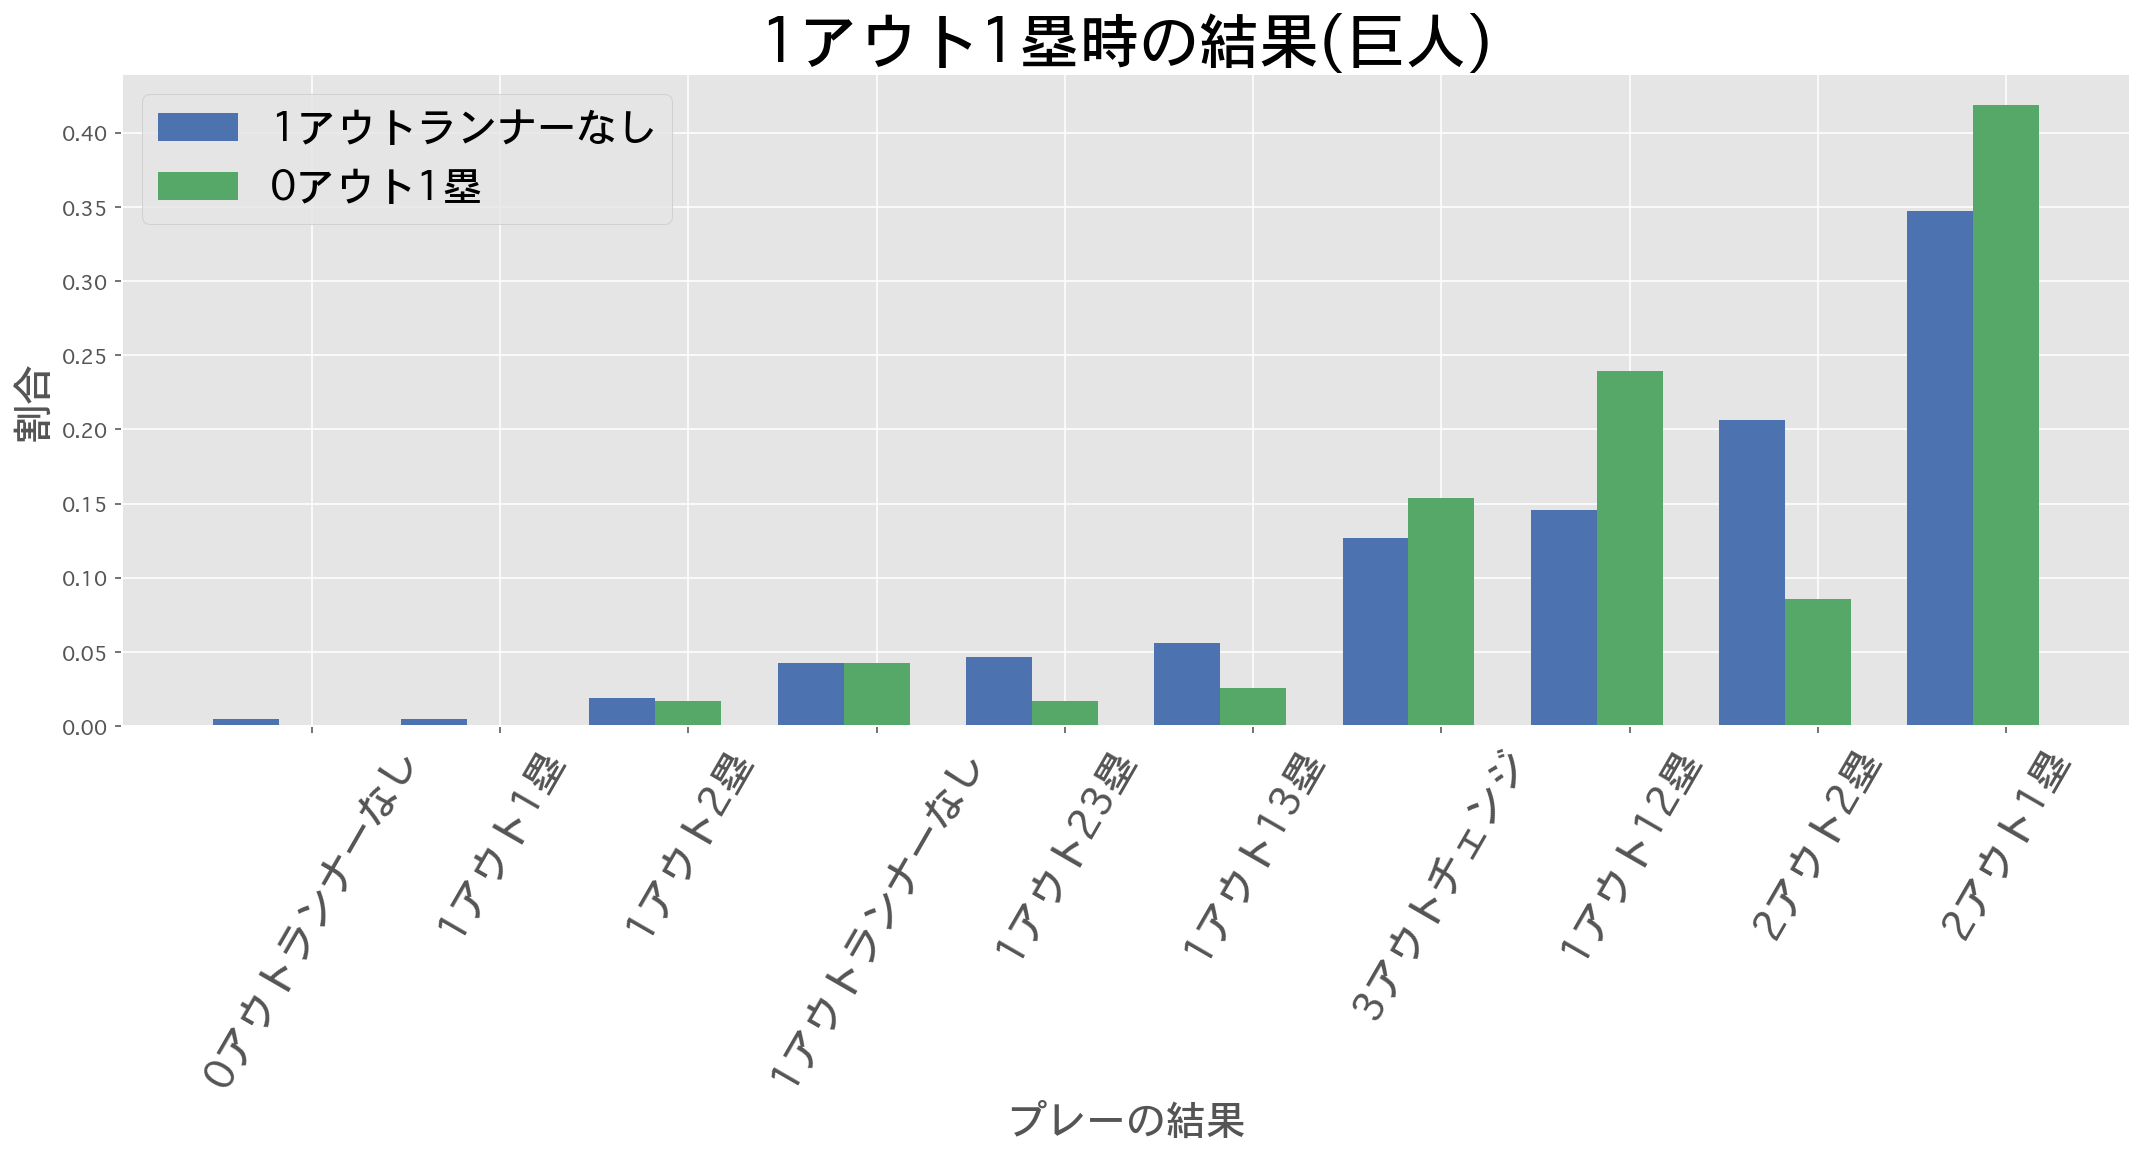

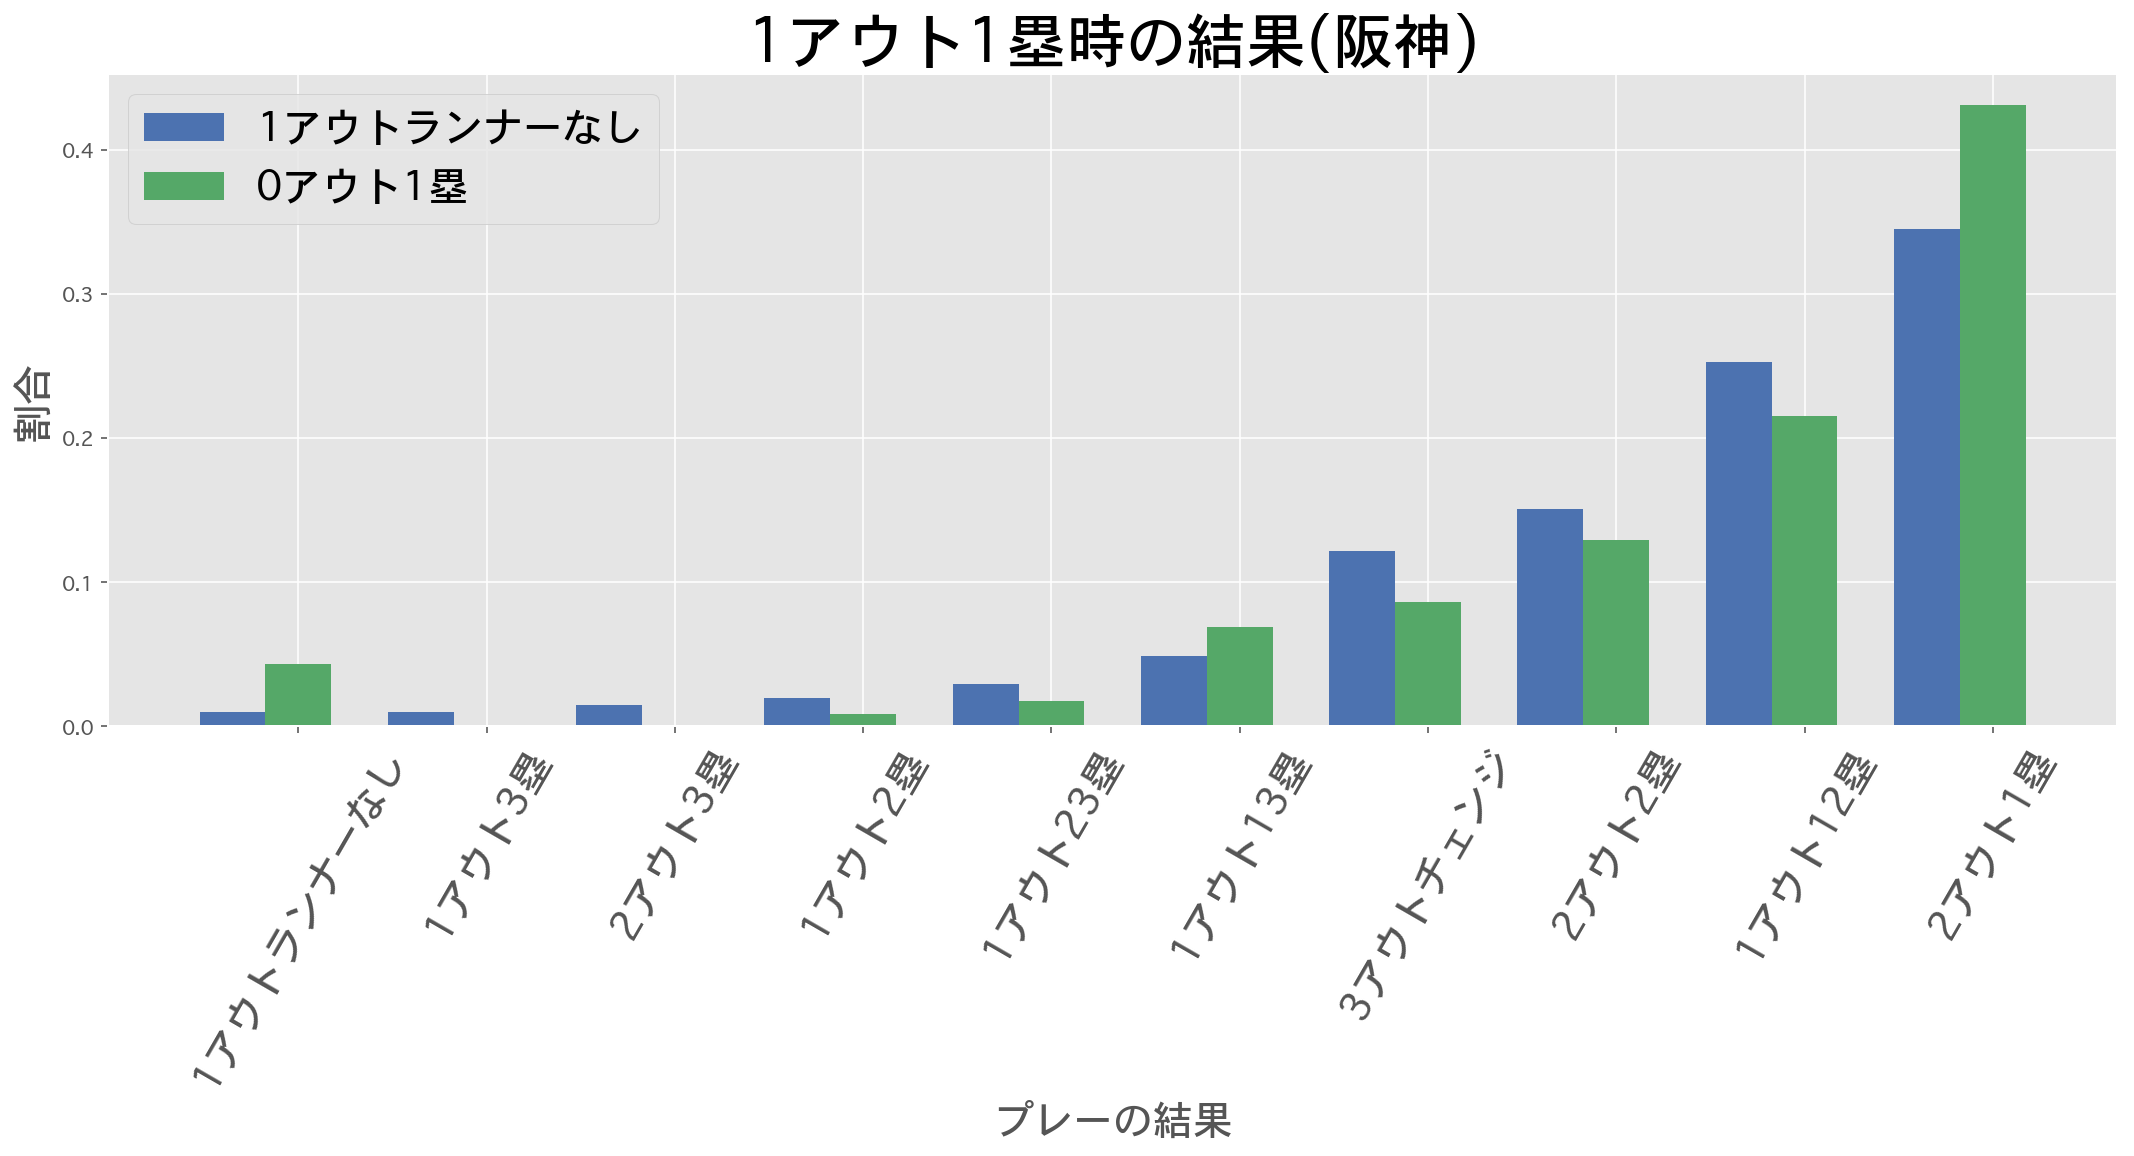

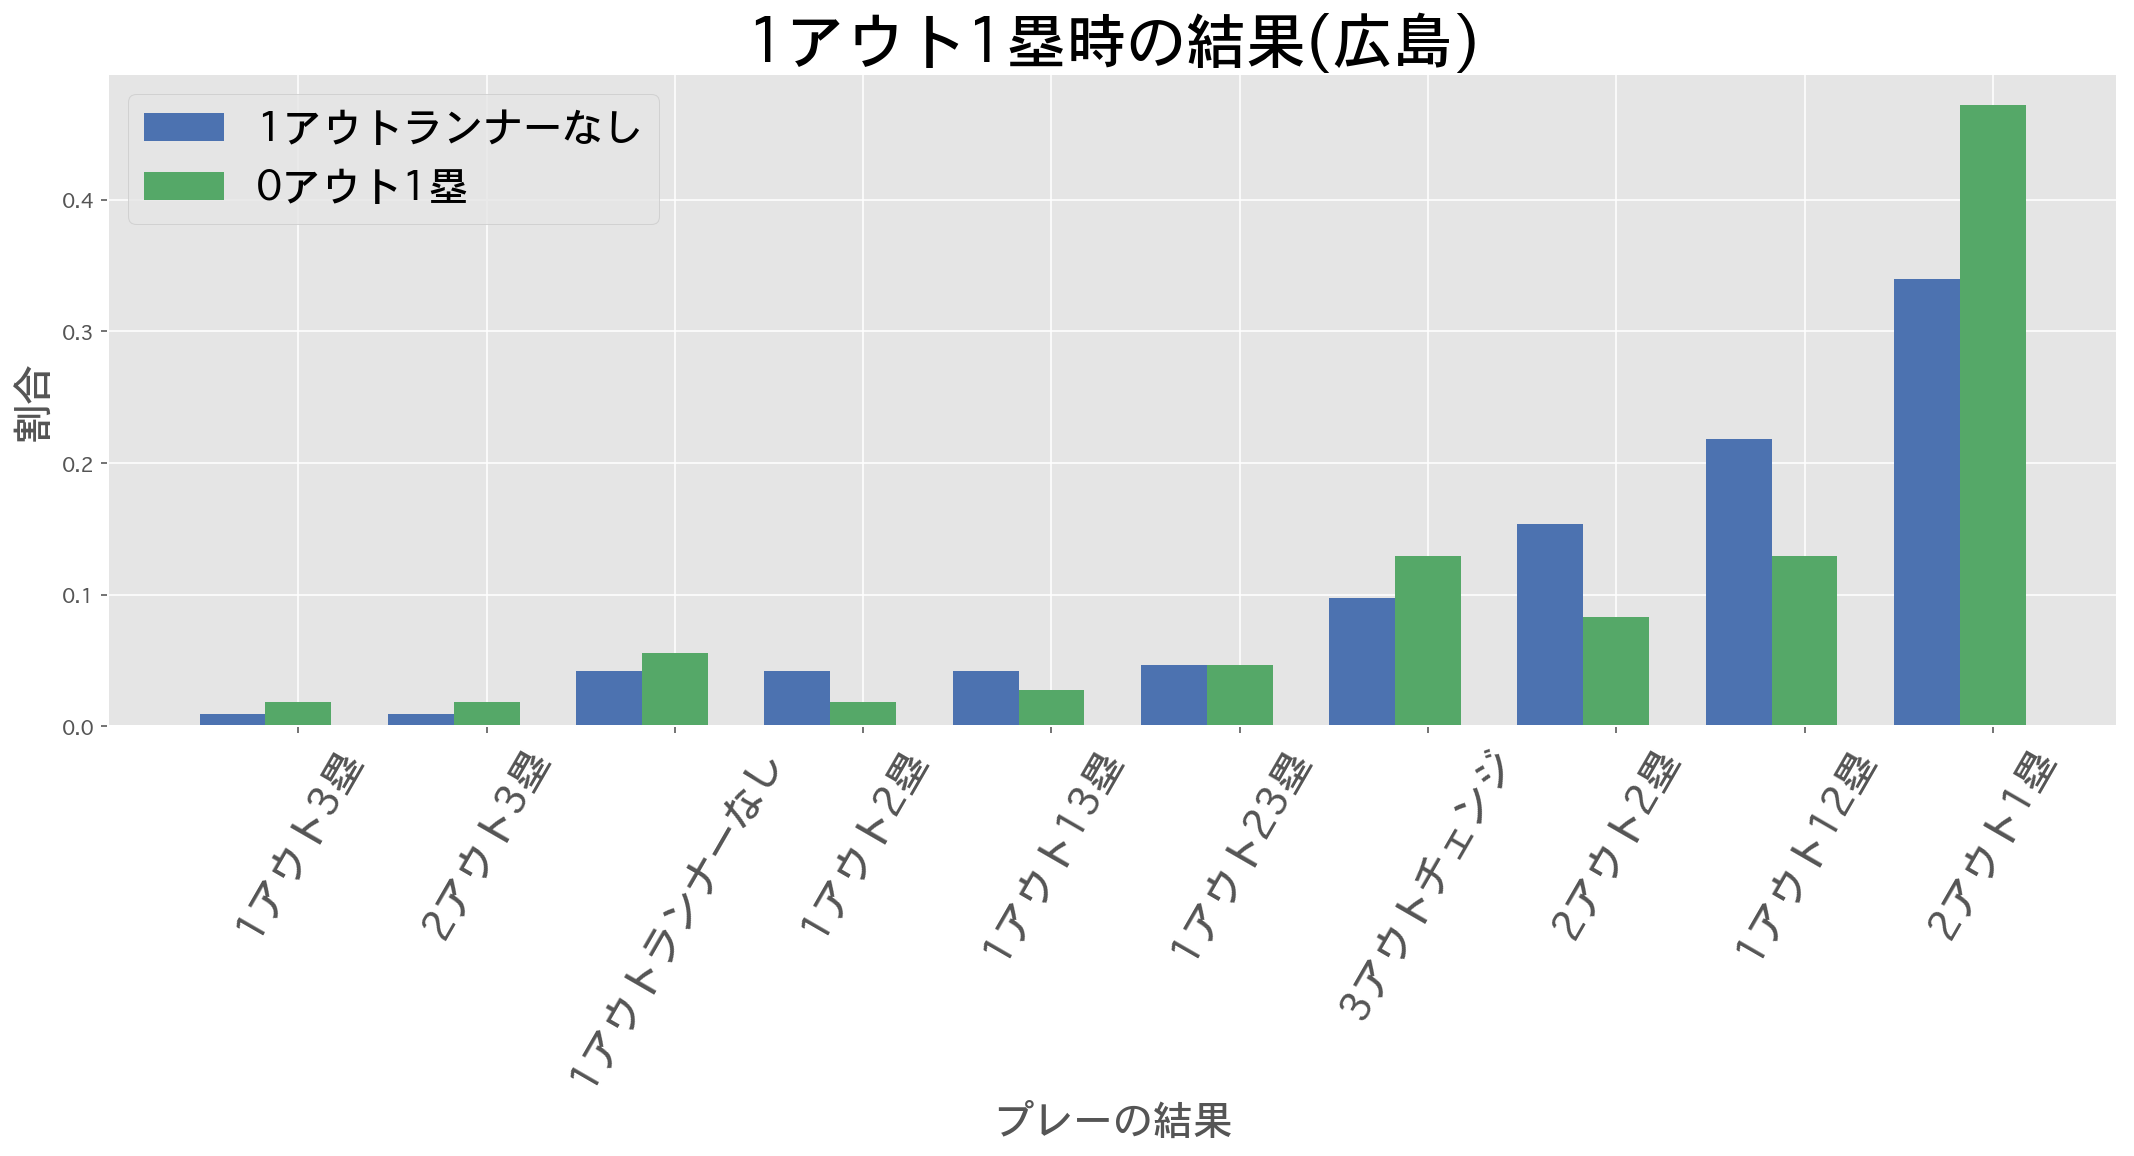

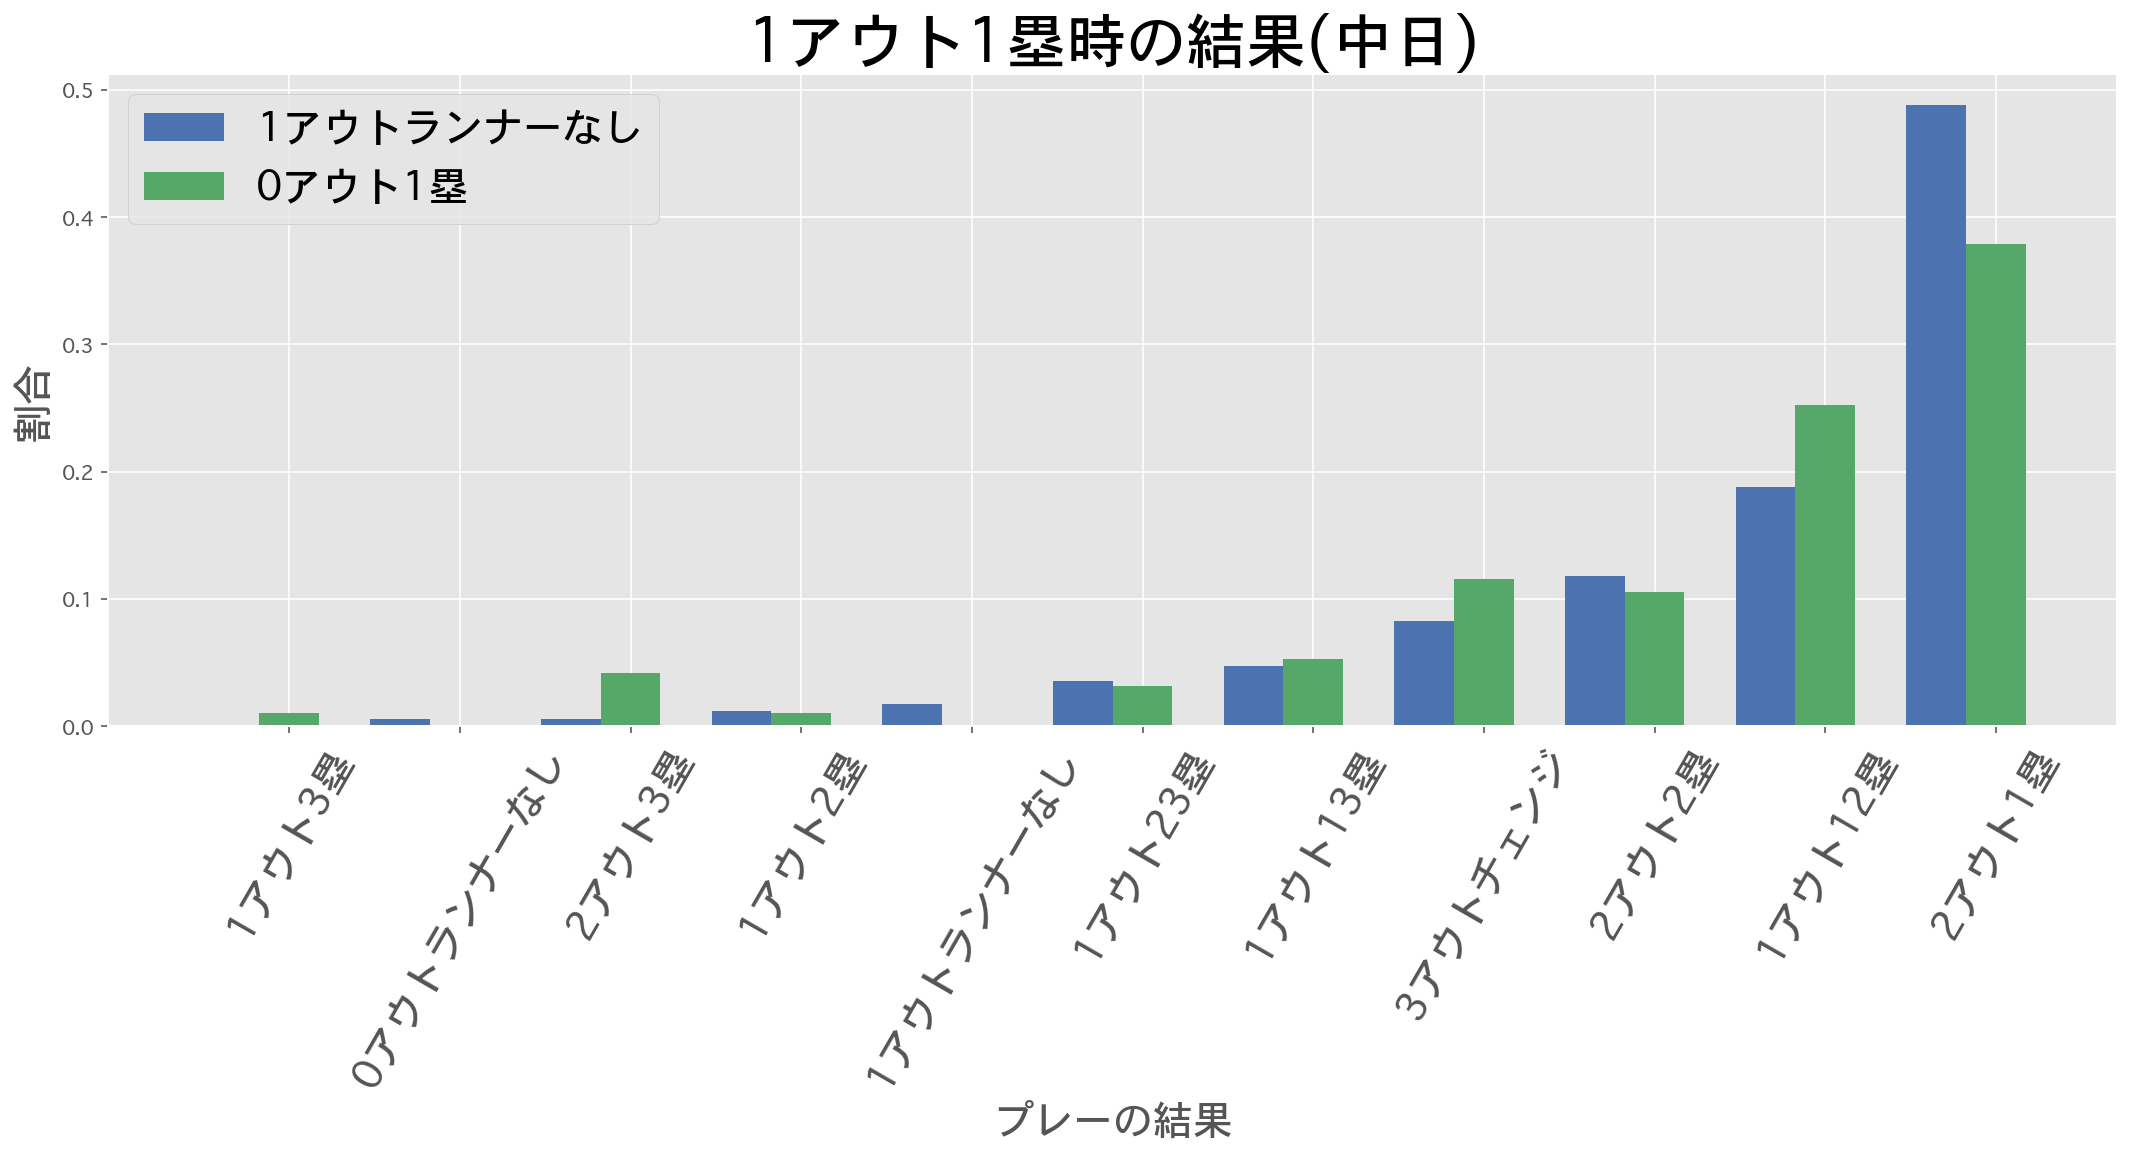

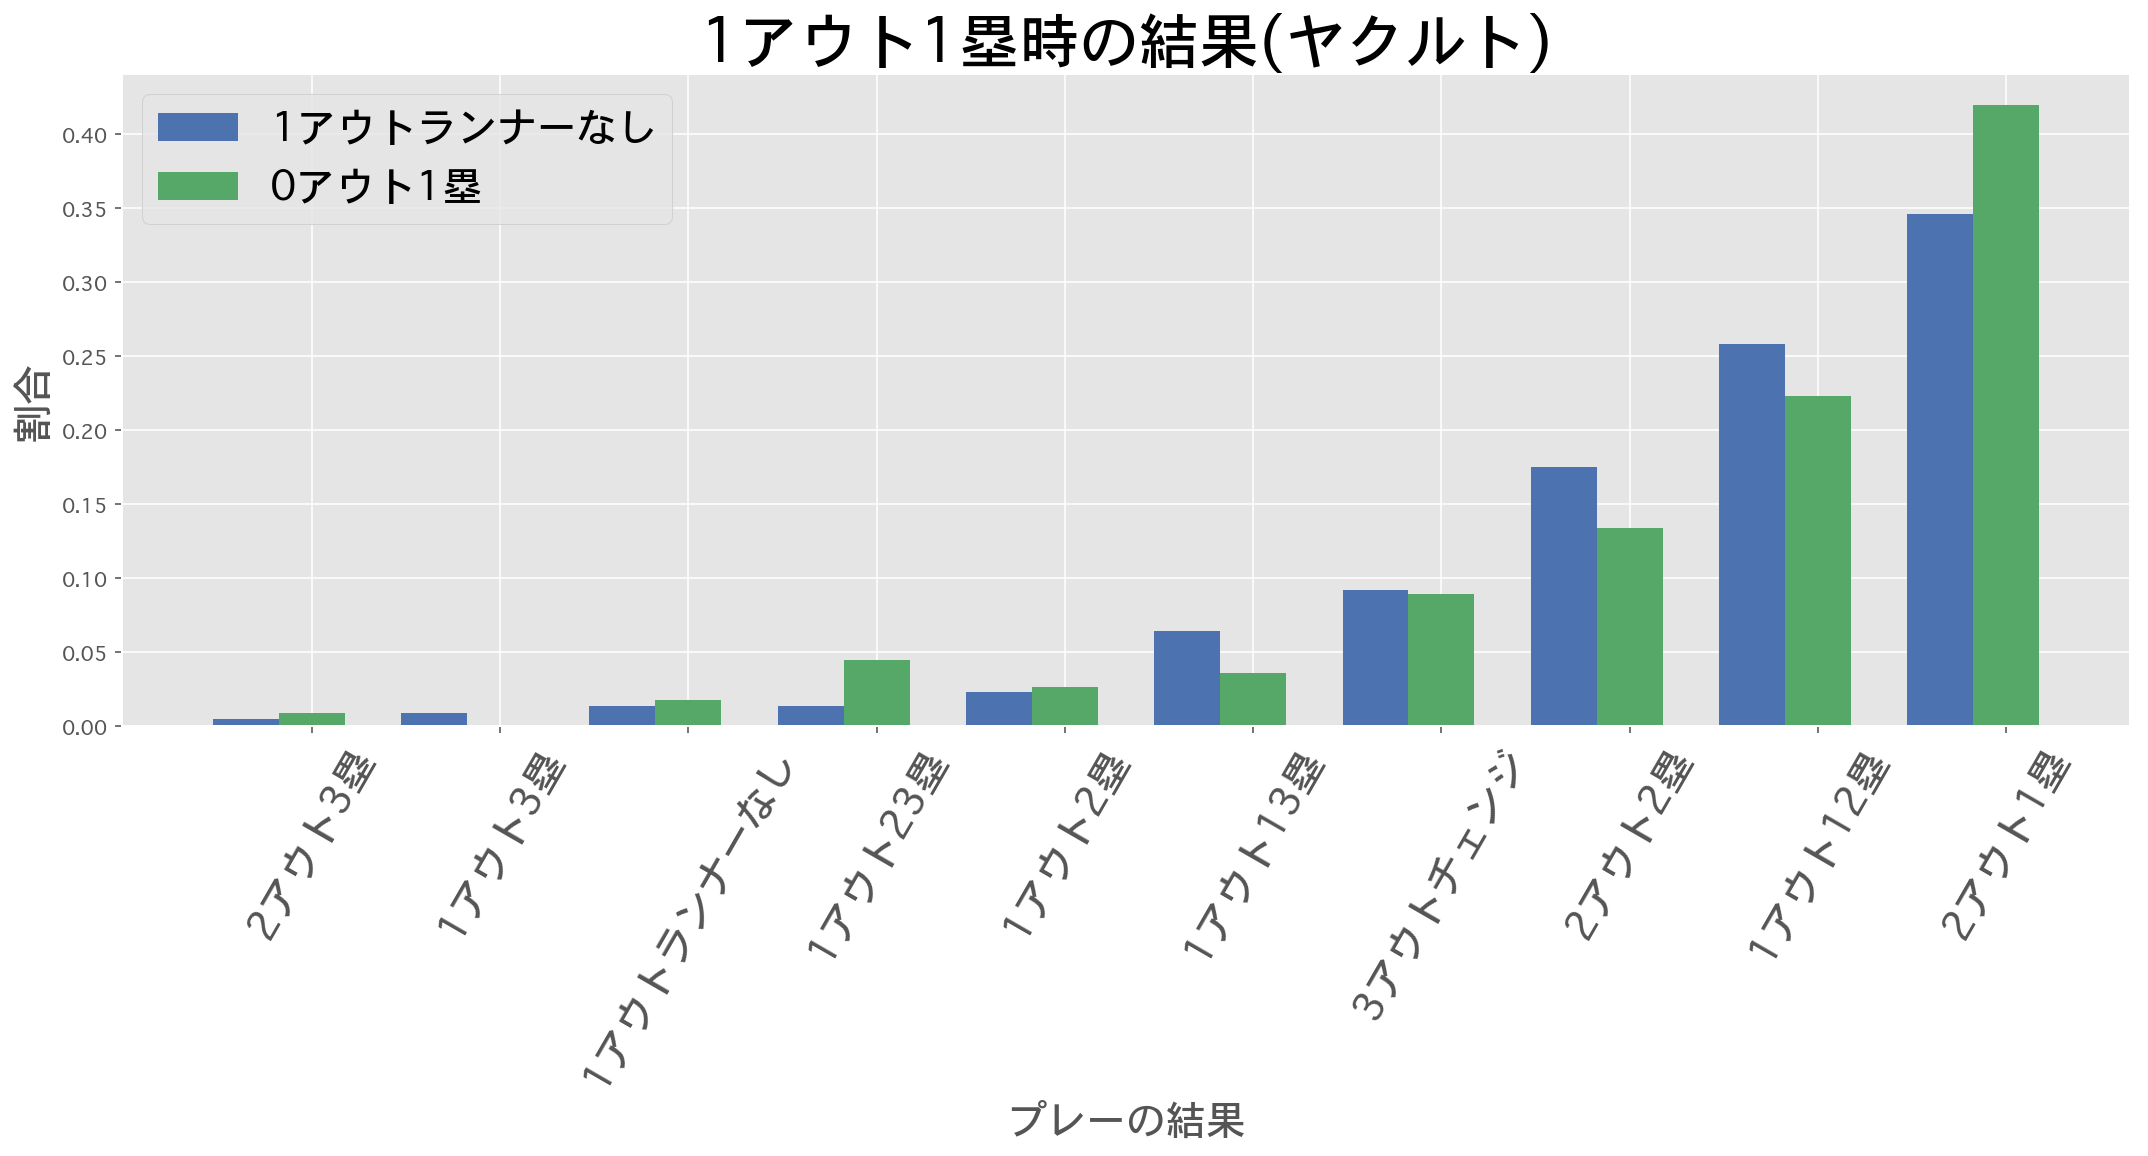

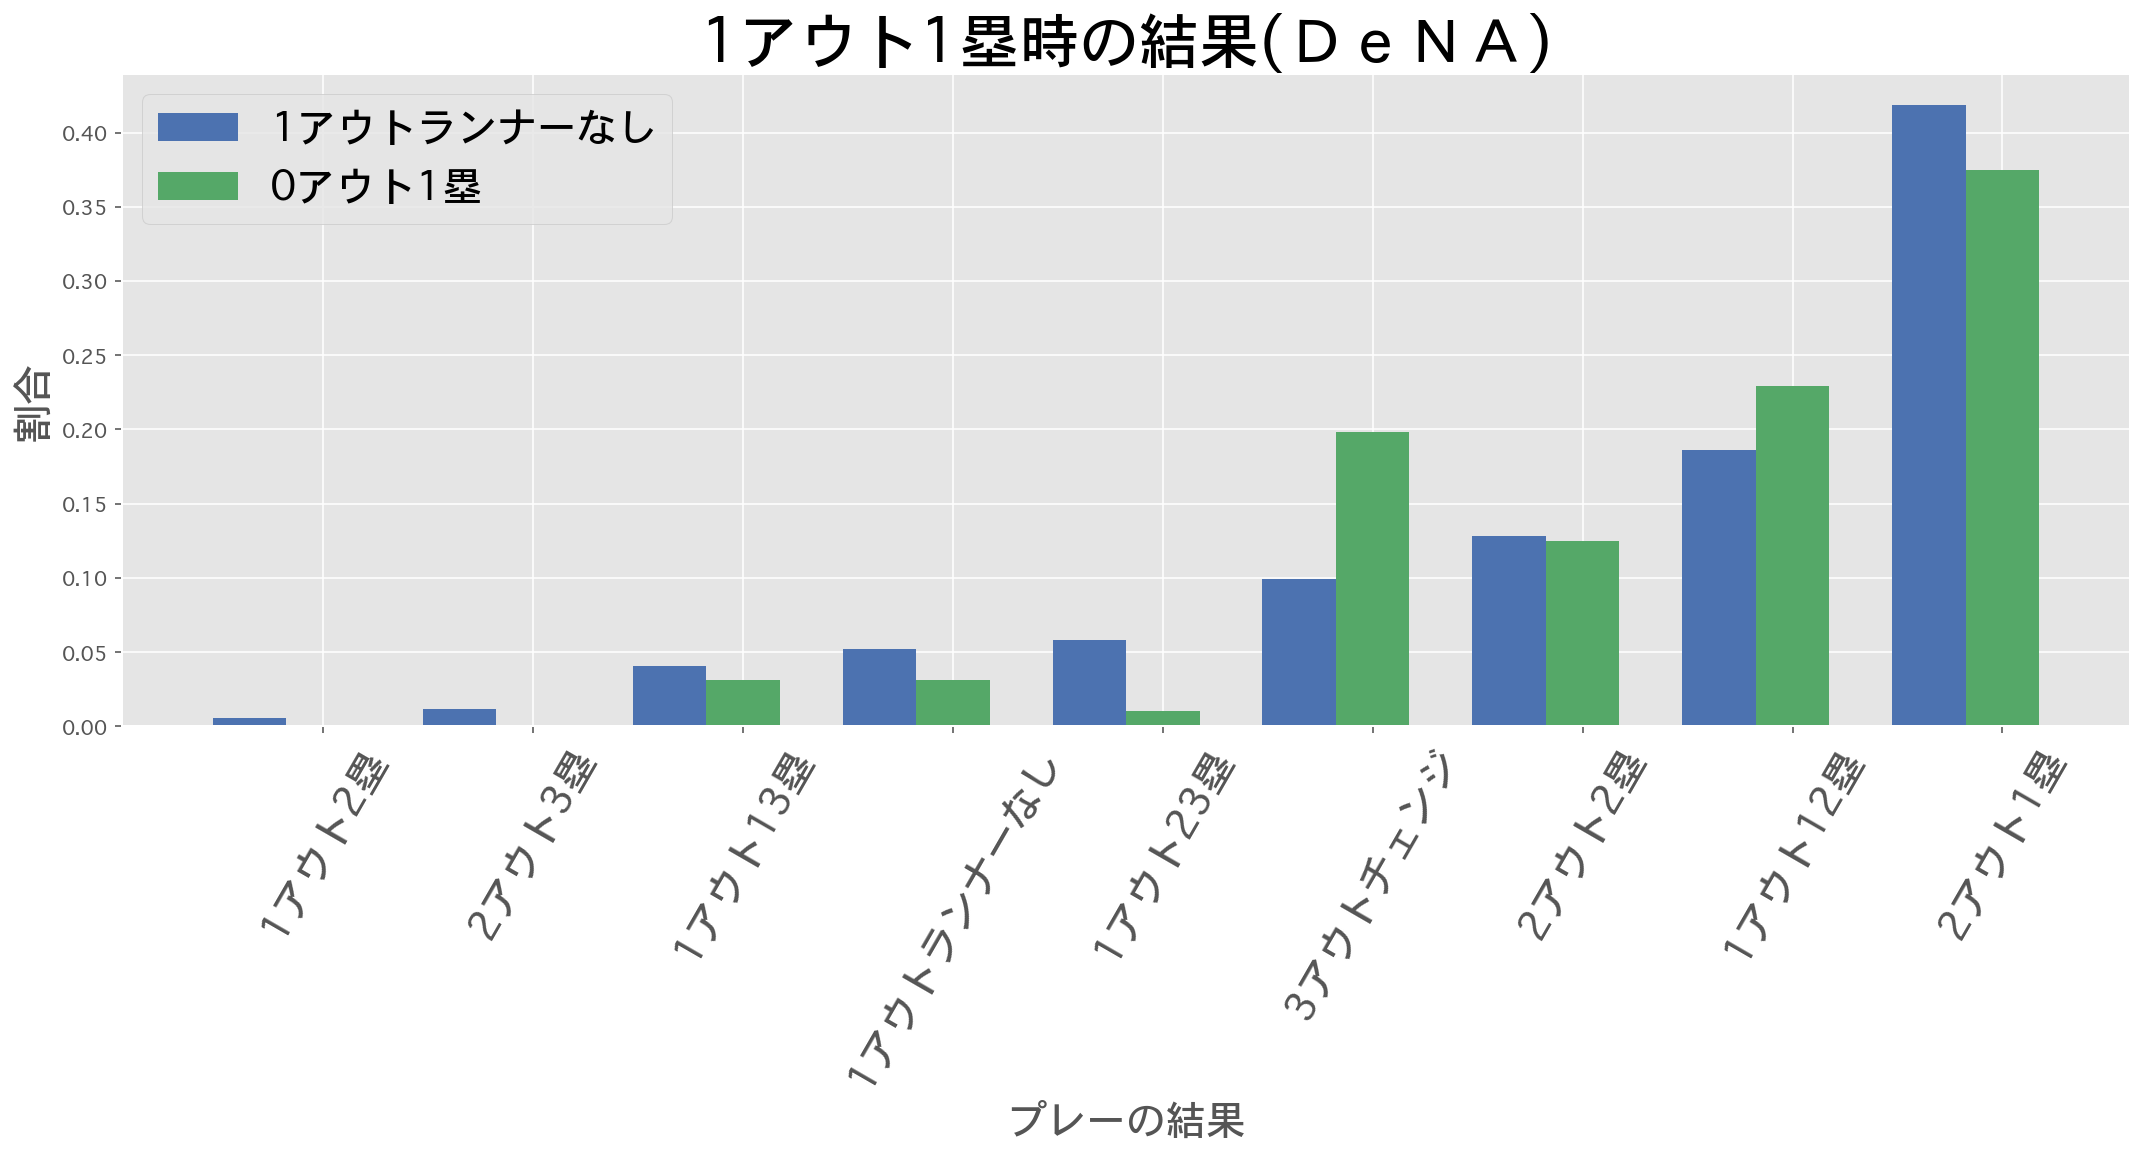

In [3]:
for team in central:
    target_flattened_triple = make_flattened_list(make_inning_triple(make_inning_list(event_df[event_df.攻撃チーム==team])))
    bar_and_df(target_flattened_triple, "1000", "0100", "1100", team, False)

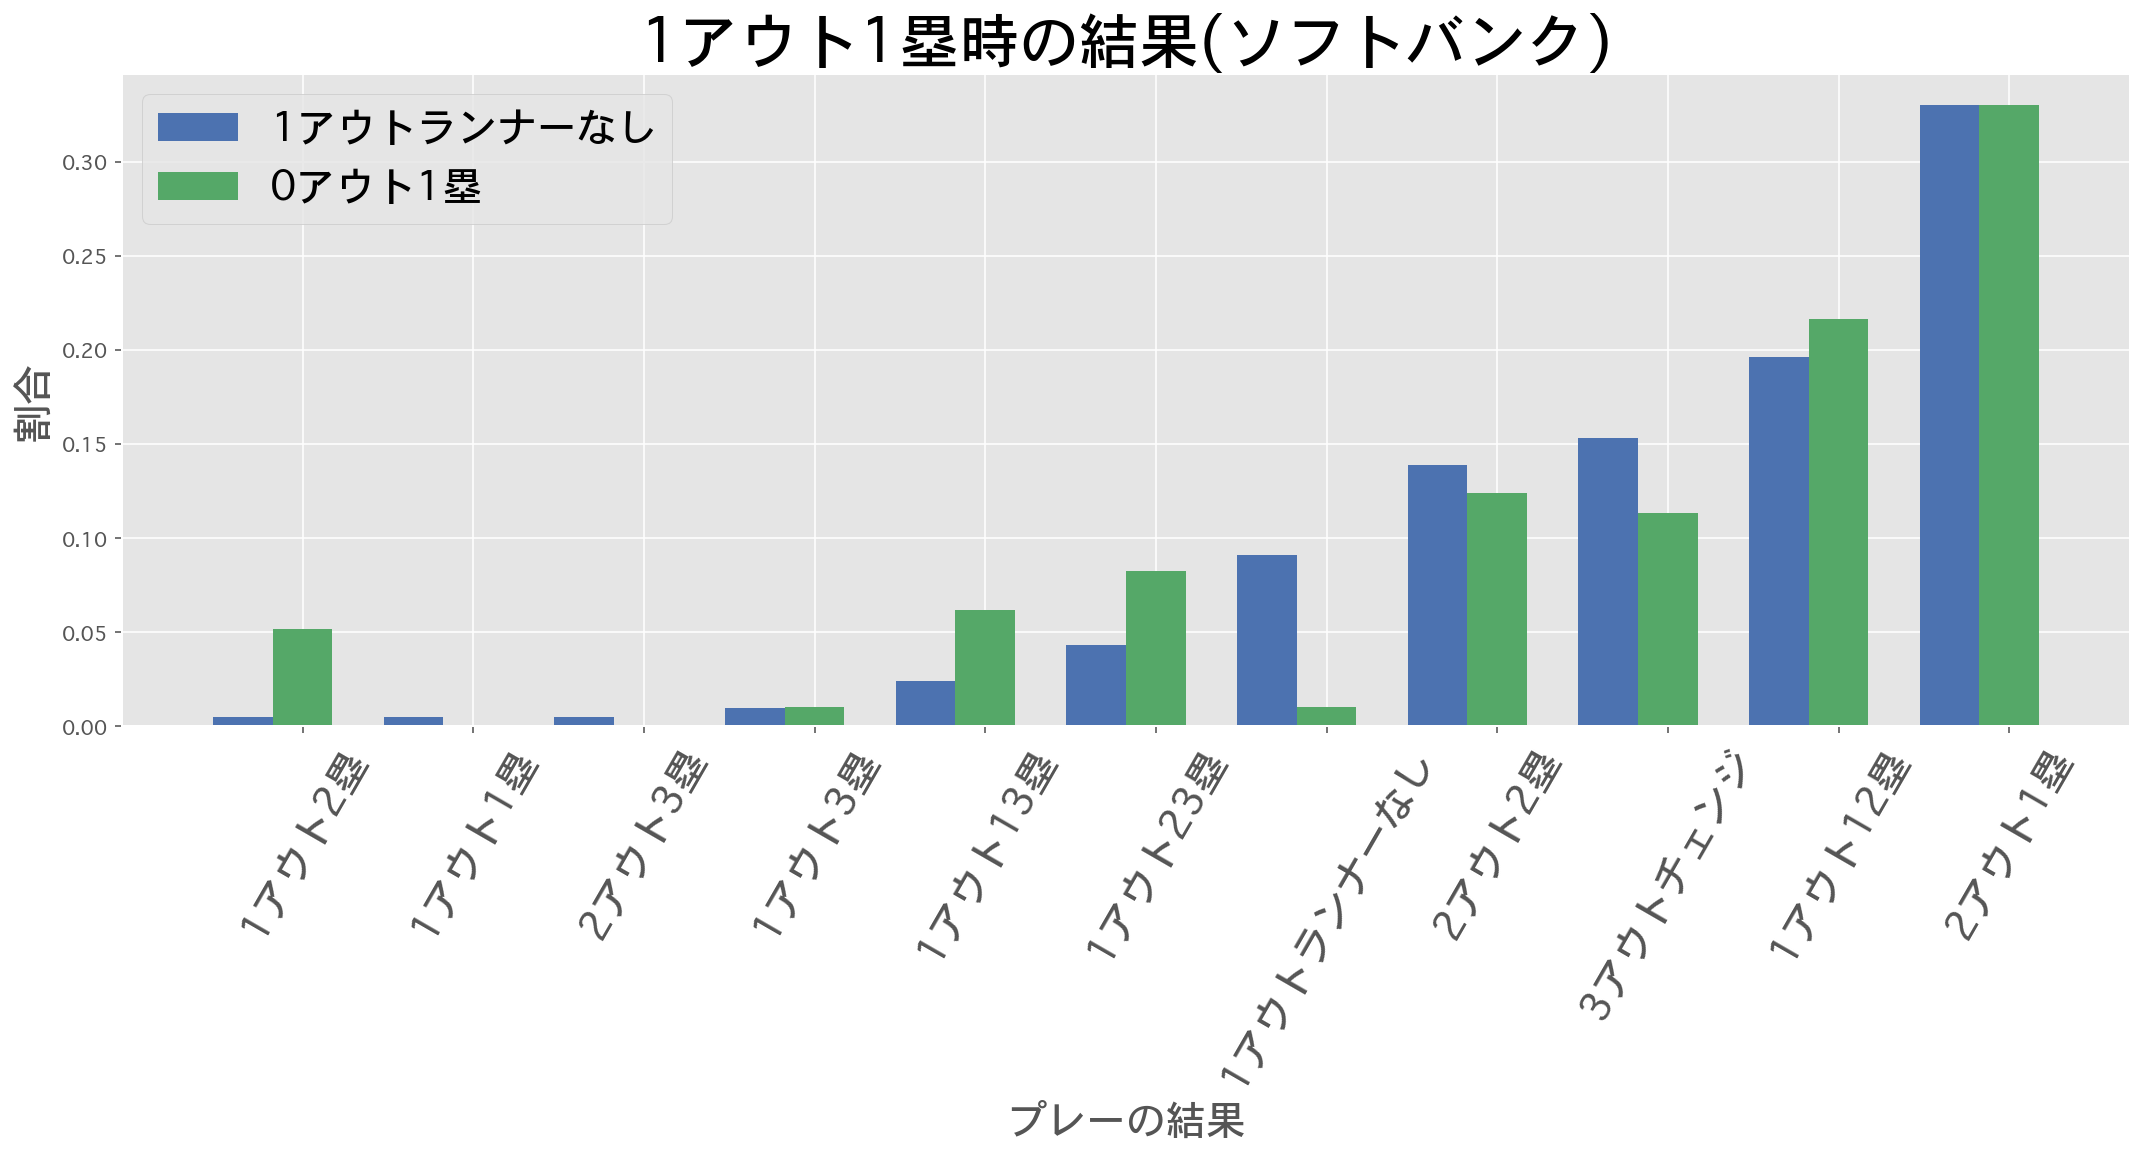

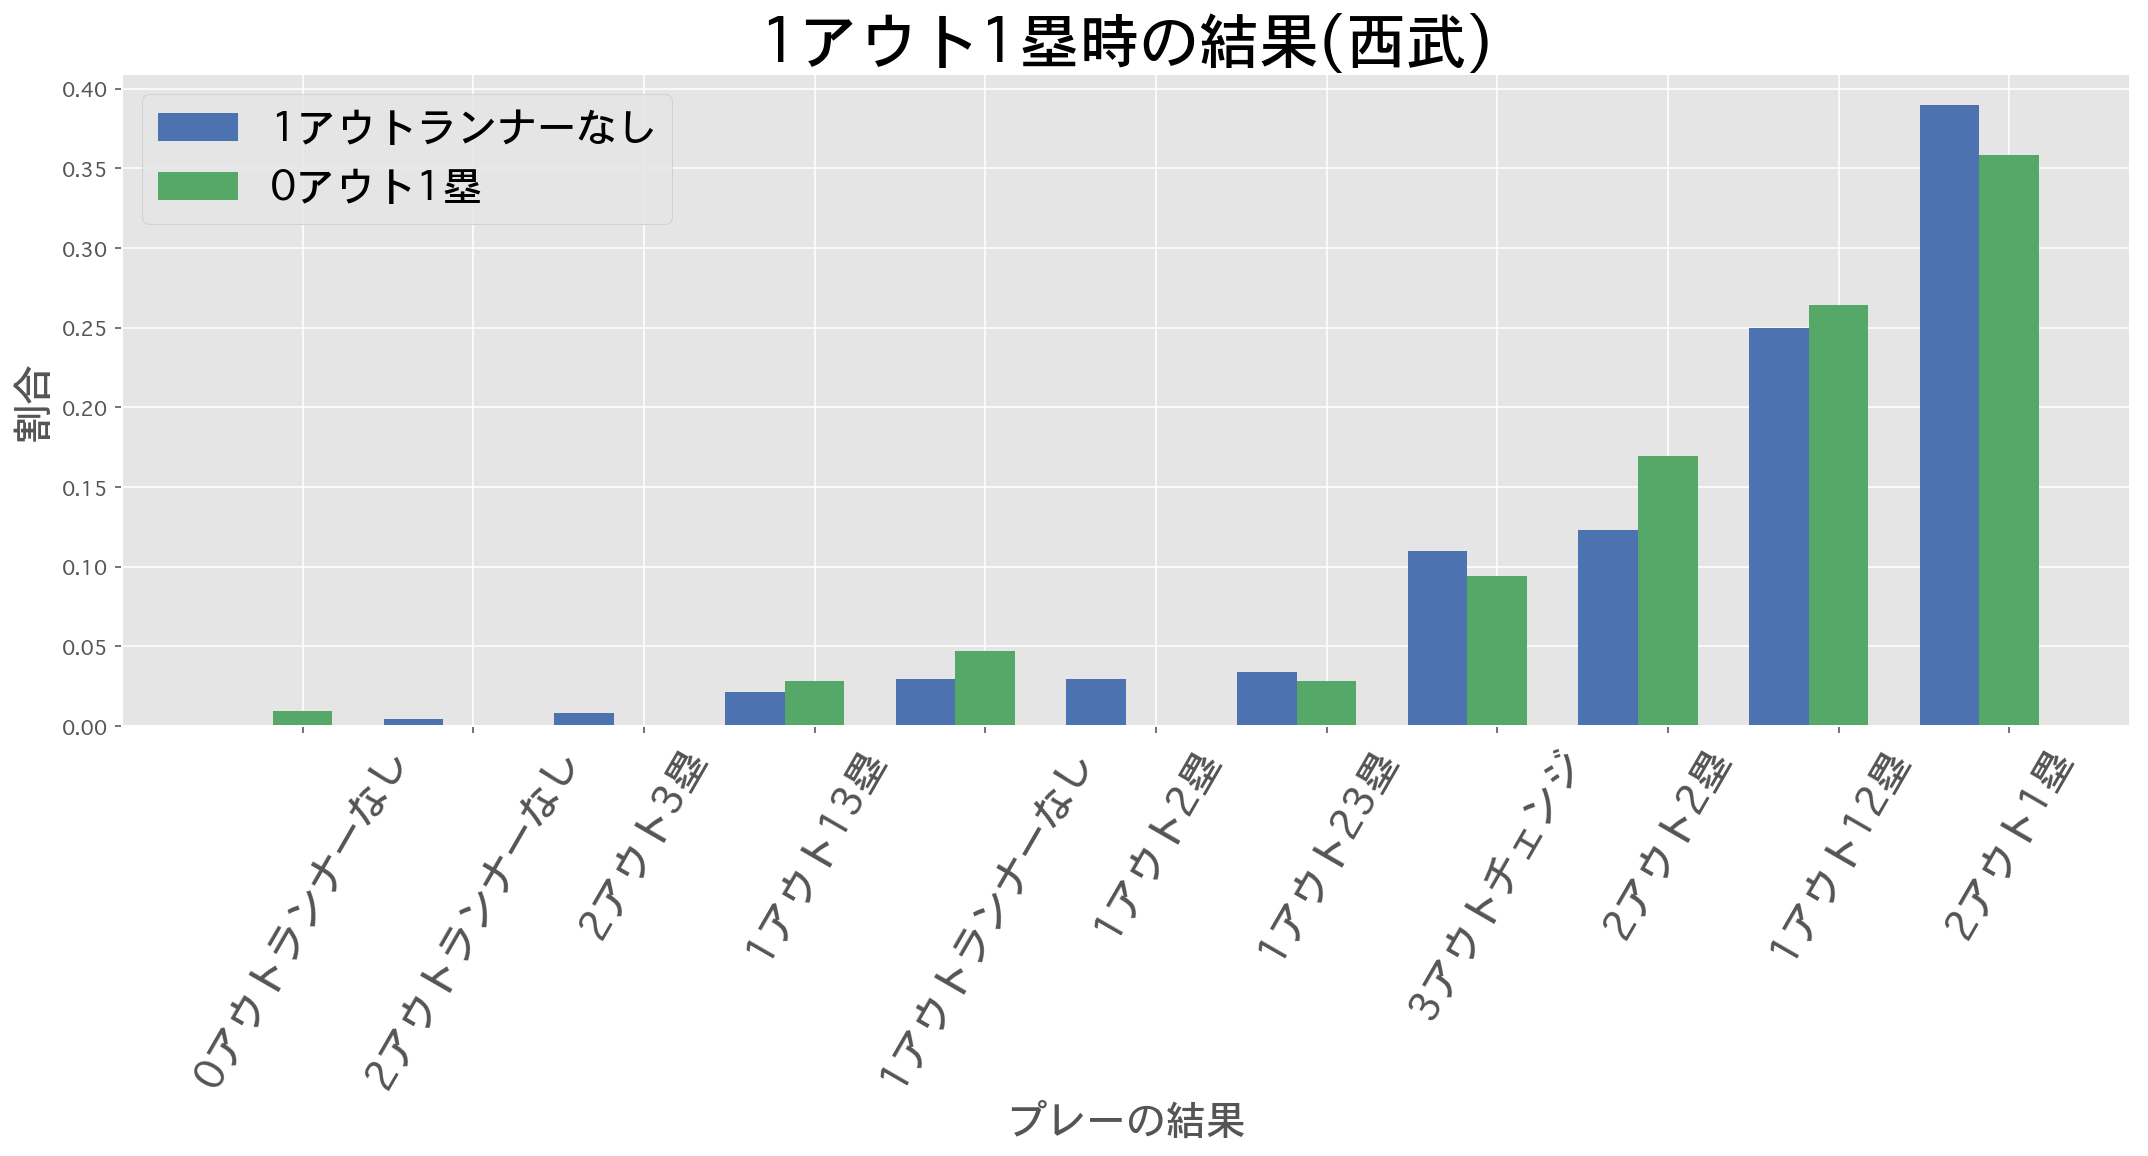

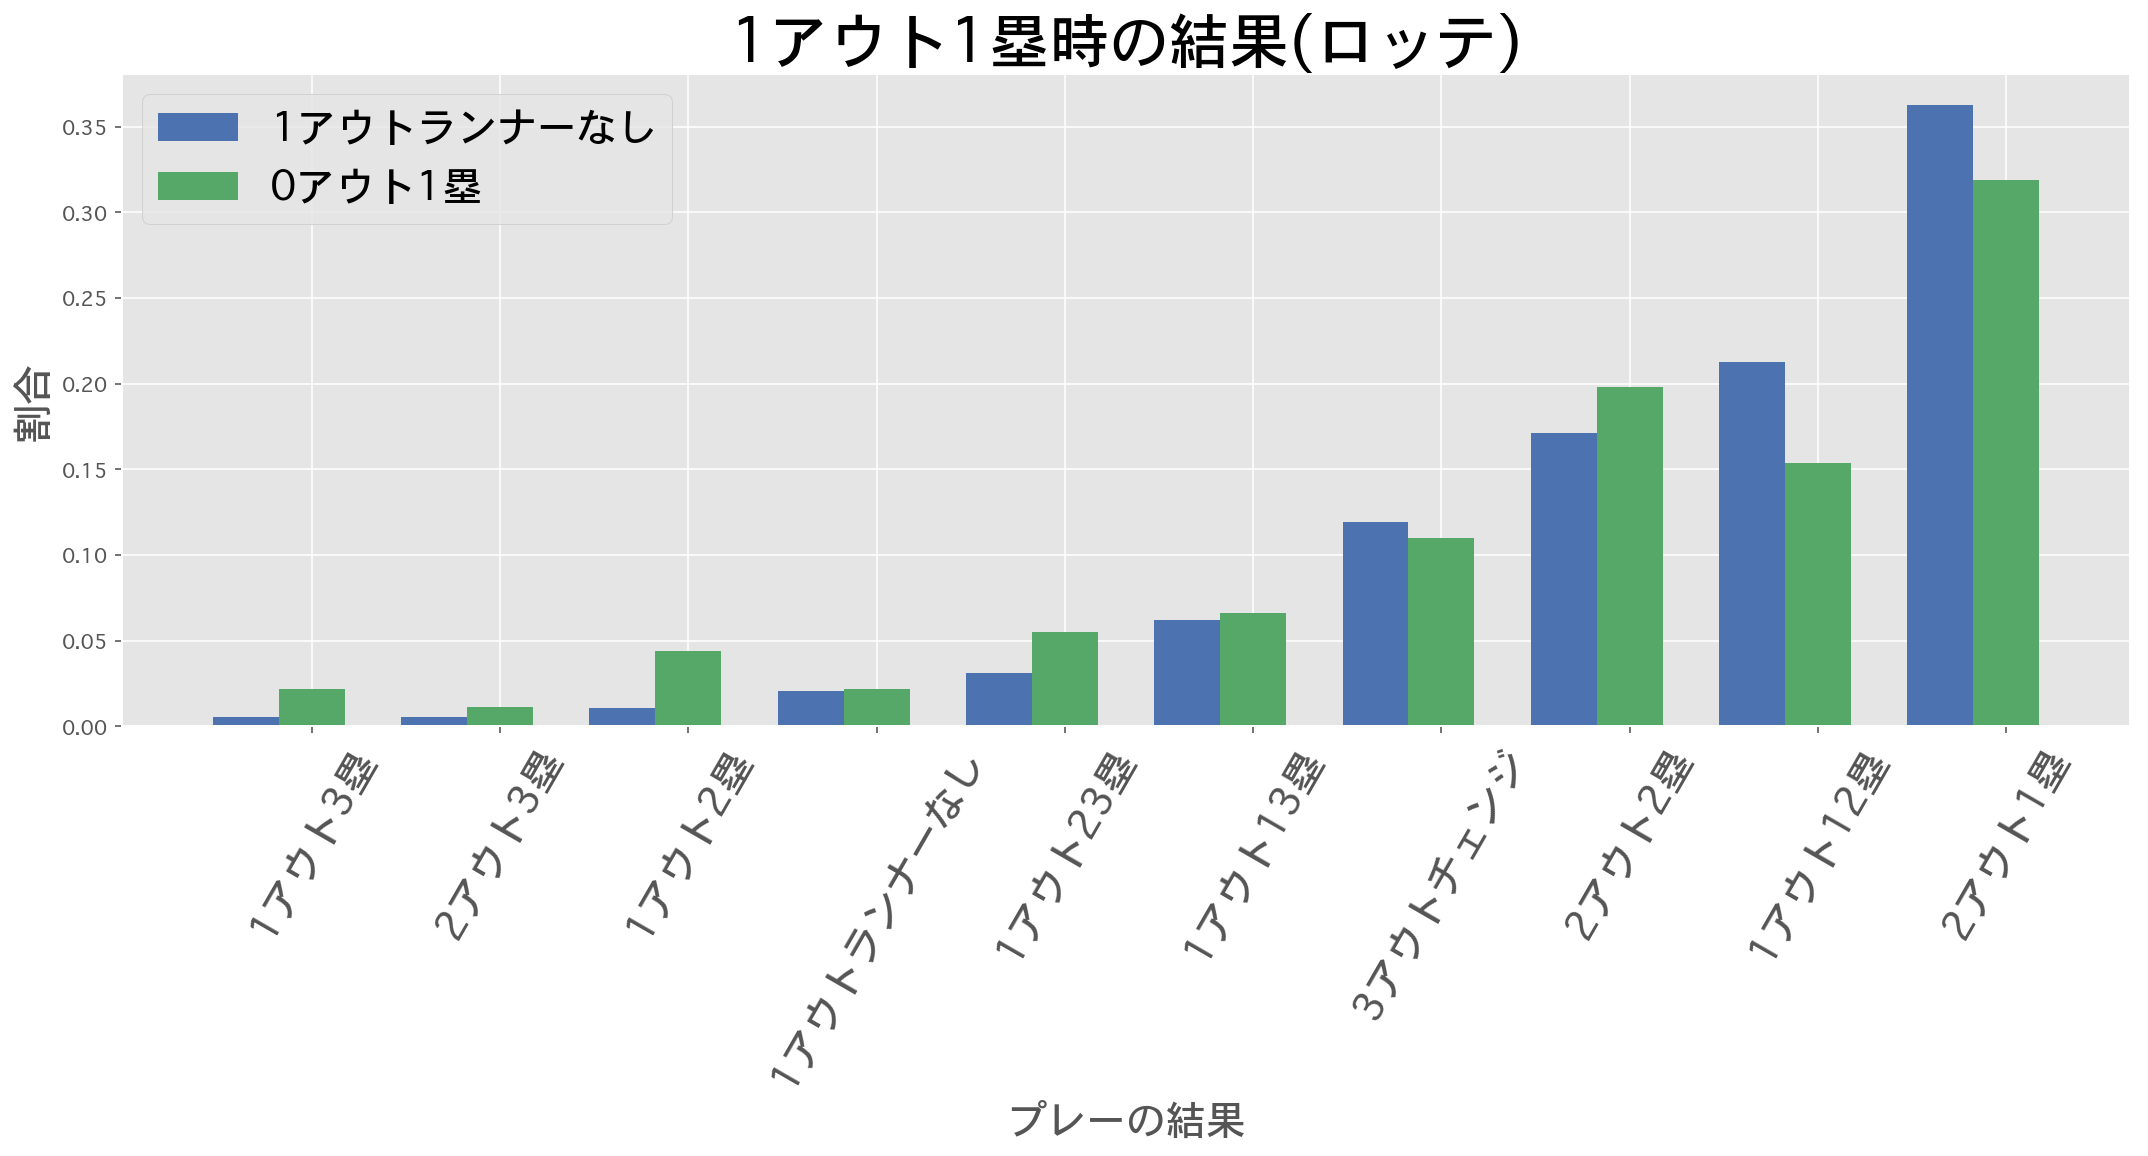

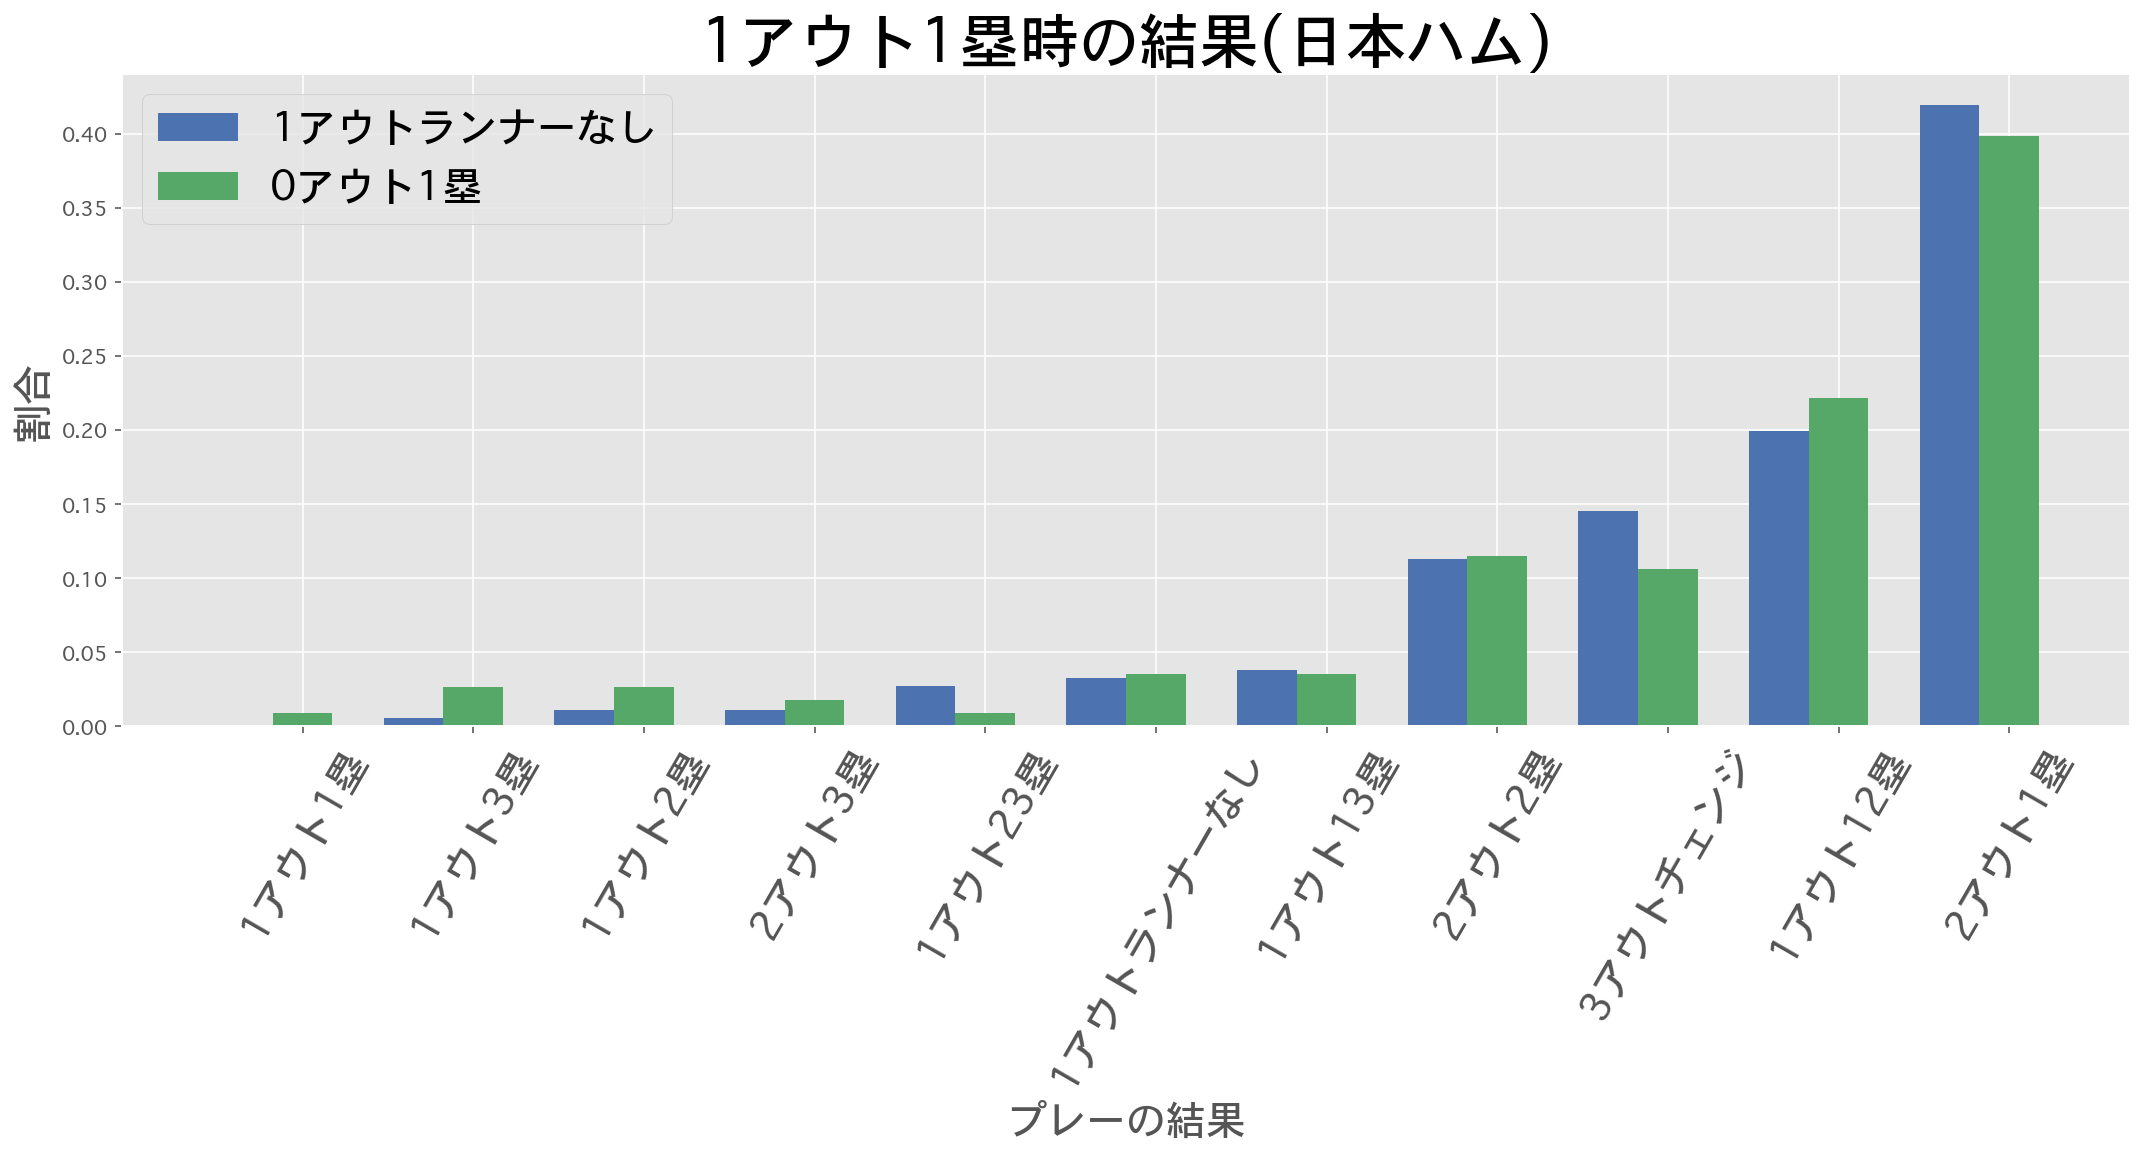

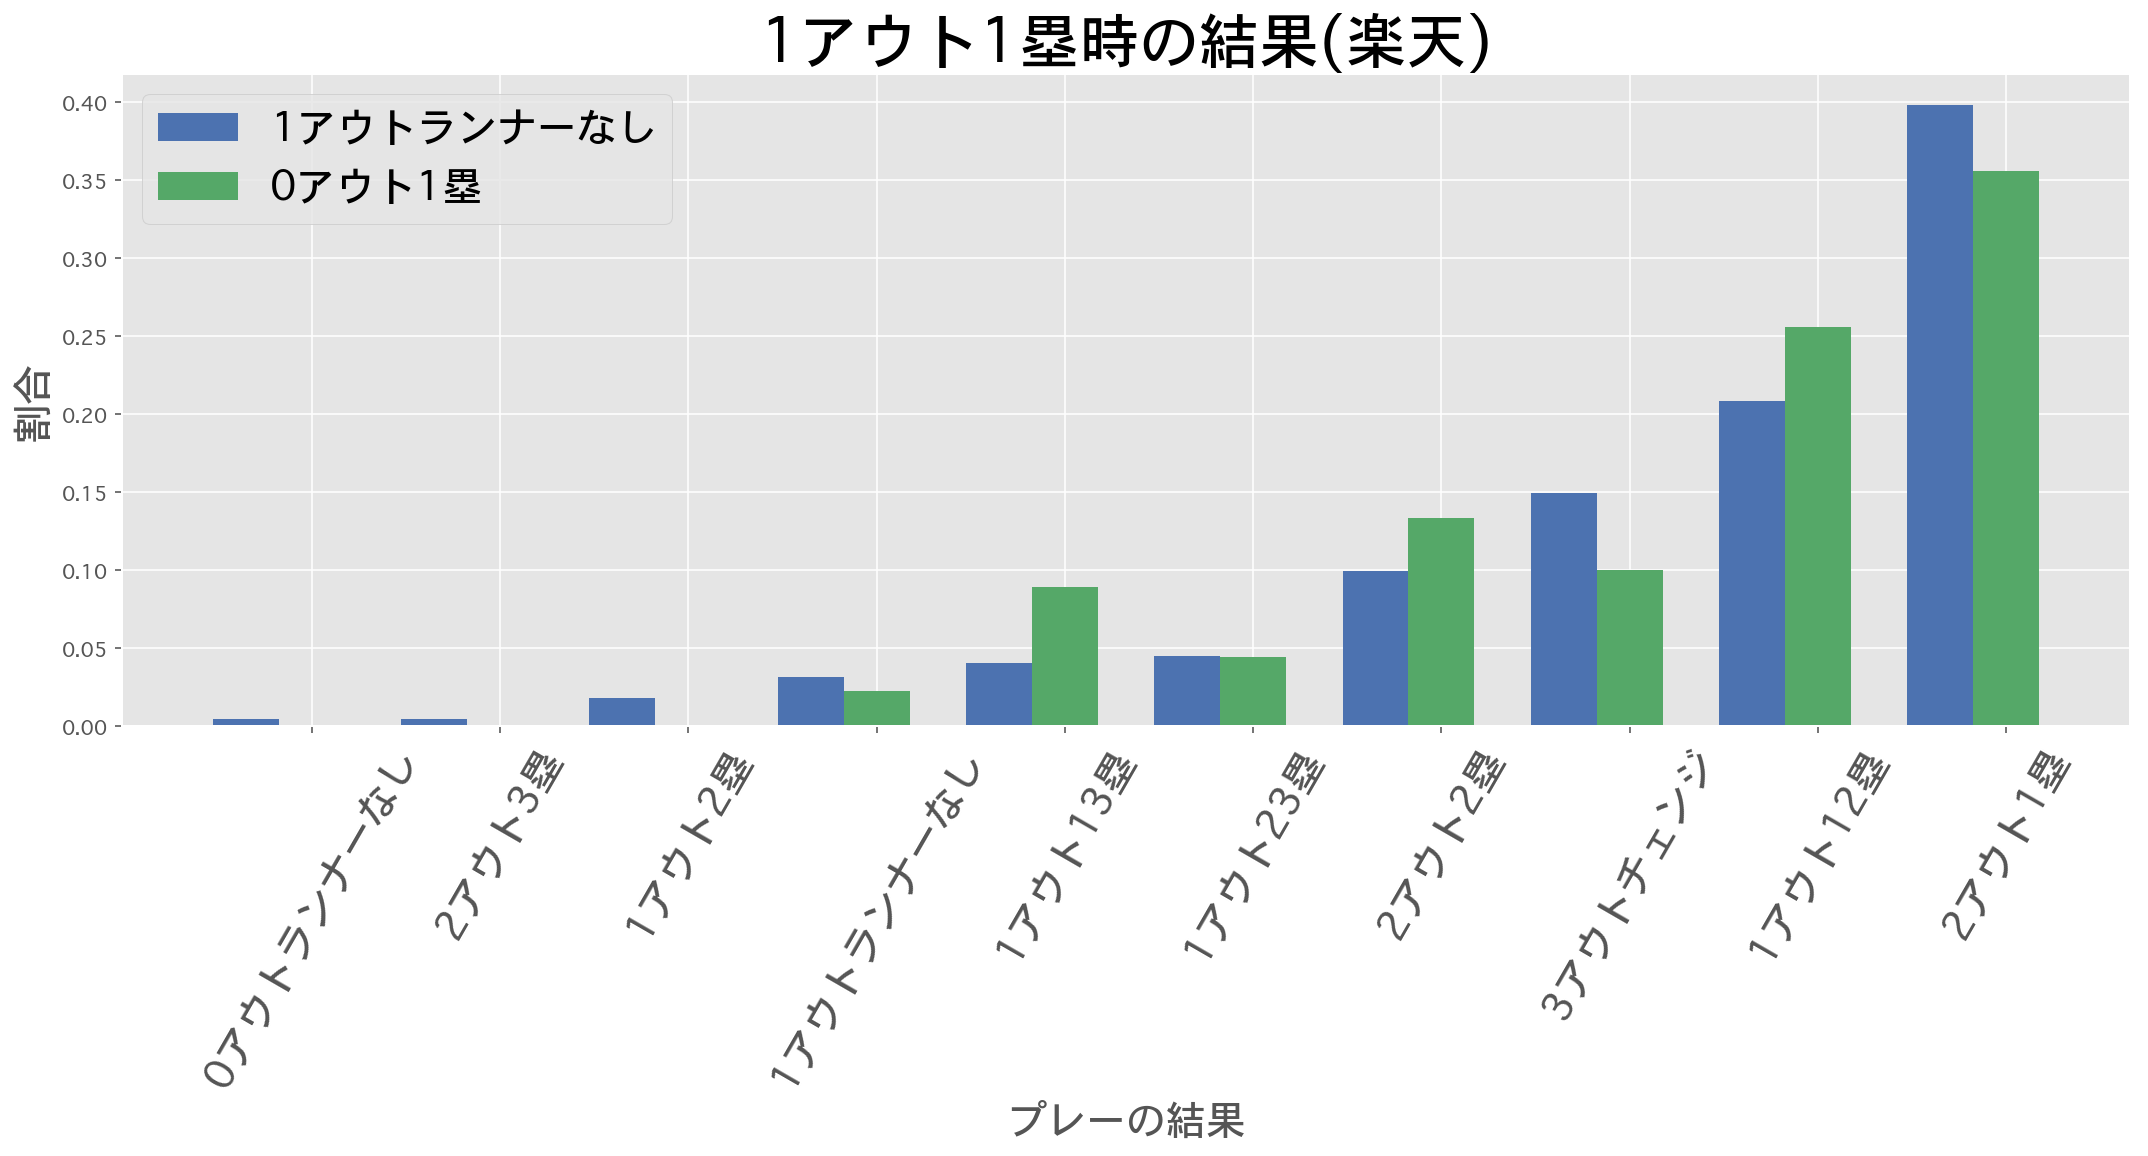

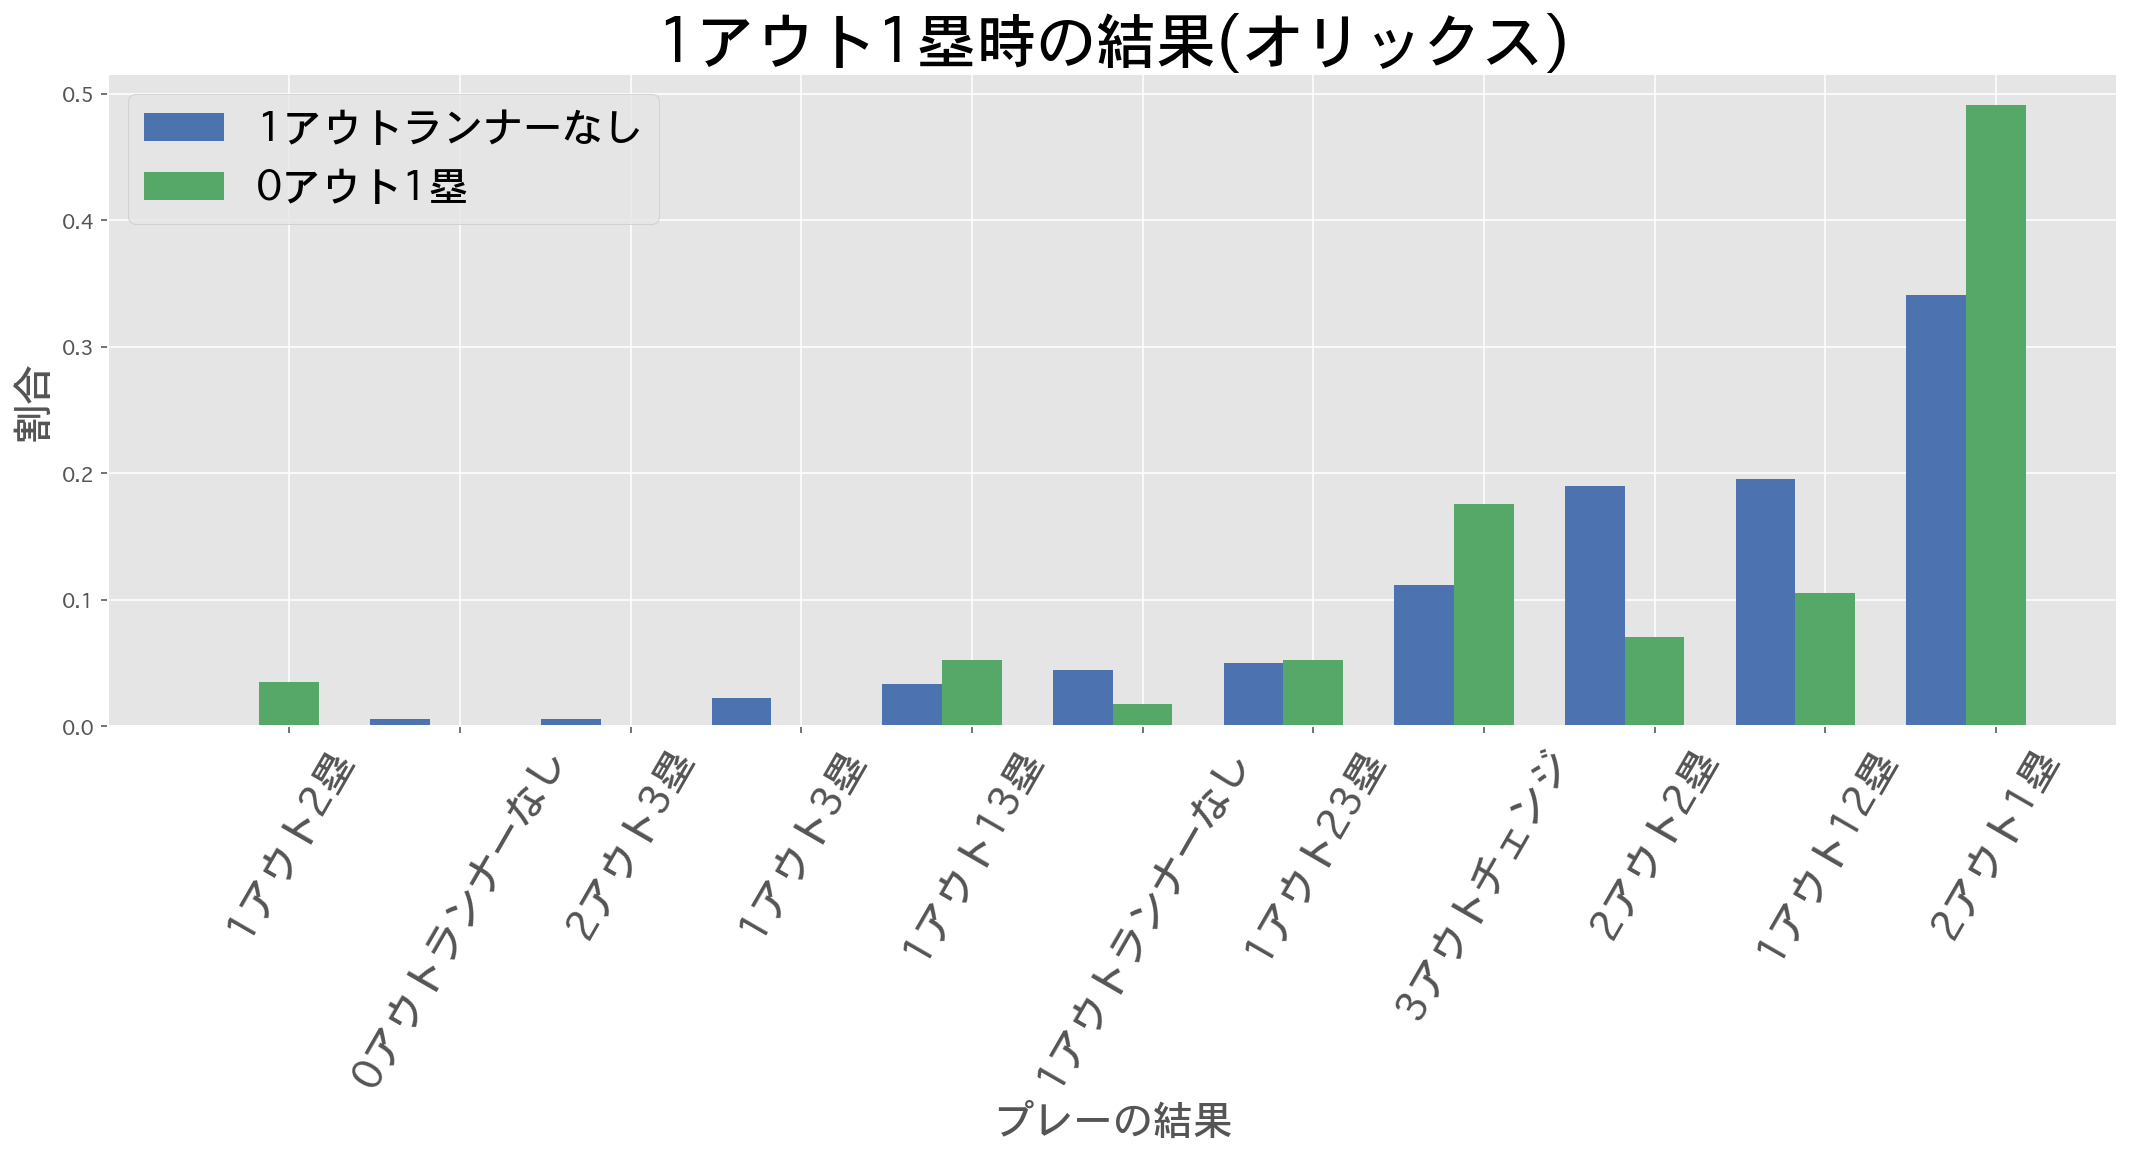

In [4]:
for team in pacific:
    target_flattened_triple = make_flattened_list(make_inning_triple(make_inning_list(event_df[event_df.攻撃チーム==team])))
    bar_and_df(target_flattened_triple, "1000", "0100", "1100", team, False)

# いらぬ

In [5]:
#event_df = pd.concat([event_df, event_df[["状況"]].shift(1).rename({"状況": "状況-1"}, axis=1), event_df[["状況"]].shift(-1).rename({"状況": "状況+1"}, axis=1)], axis=1)

In [6]:
"""def extract_case(event_df, before_2, before_1):
    con_event_df = pd.concat([event_df, event_df[["状況"]].shift(1).rename({"状況": "状況-1"}, axis=1), event_df[["状況"]].shift(2).rename({"状況": "状況-2"}, axis=1)], axis=1)
    return con_event_df[(con_event_df["状況-1"]==before_1) & (con_event_df["状況-2"]==before_2)]"""

'def extract_case(event_df, before_2, before_1):\n    con_event_df = pd.concat([event_df, event_df[["状況"]].shift(1).rename({"状況": "状況-1"}, axis=1), event_df[["状況"]].shift(2).rename({"状況": "状況-2"}, axis=1)], axis=1)\n    return con_event_df[(con_event_df["状況-1"]==before_1) & (con_event_df["状況-2"]==before_2)]'

In [7]:
"""def make_triple_from_case(con_event_df):
    return [list(reversed(elem)) for elem in con_event_df[["状況", "状況-1", "状況-2"]].values.tolist()]"""

'def make_triple_from_case(con_event_df):\n    return [list(reversed(elem)) for elem in con_event_df[["状況", "状況-1", "状況-2"]].values.tolist()]'

In [8]:
#ad_list = make_triple_from_case(extract_case(event_df[event_df.攻撃チーム=="巨人"], "1000", "1100"))
#dis_list = make_triple_from_case(extract_case(event_df[event_df.攻撃チーム=="巨人"], "0100", "1100"))